# Data Challenge Project Work CO2

## 1. Introduction

###### Ka Men Ho, Luana Aido da Silva, Michèle Pfister

The project explores the performance of machine learning (ML) algorithms for the prediction and diagnosis of heart disease. As heart disease remains one of the leading causes of mortality worldwide, in this data challenge project we aim to understand, how early detection strategies can be improved using these tools, which have the potential to enhance patient outcomes and reduce disease-related mortality (Alshenawy, 2024).

The underlying biological mechanisms of heart attacks and strokes involve obstruction of blood flow to the heart or brain due to arterial plaque accumulation or thrombus formation. A major clinical challenge is that symptoms of heart disease are often nonspecific, overlapping with those of other conditions or being misattributed to normal aging, which complicates preventive and accurate diagnosis (Quah et al., 2014).

Machine learning has become an increasingly important tool in healthcare, enhancing clinical decision-making in disease prediction and diagnosis. Traditional approaches relied largely on practitioners’ interpretation of a patient’s medical history, reported symptoms, and physical examination findings (Karthick et al., 2022).

The dataset used in this project was obtained from the University of California Irvine (UCI) Machine Learning Repository and is widely employed for heart disease prediction tasks. Patient outcomes were determined using cardiac catheterization, considered the clinical gold standard, where individuals exhibiting more than 50% narrowing of a coronary artery were classified as having heart disease.
The dataset comprises 270 patient records and includes 13 independent predictive variables. Detailed descriptions of these attributes are provided in the UCI repository documentation (University of California, Irvine, n.d.)

An updated version of the heart disease dataset includes 303 consecutive patients referred for coronary angiography at the Cleveland Clinic in Cleveland, Ohio, between May 1981 and September 1984. This cohort was used to develop the Cleveland algorithm, a computerized diagnostic model whose regression coefficients were later validated using independent patient populations from Budapest, Long Beach, and Switzerland.
The Cleveland cohort had a mean age of 54 years, consisted of 68% men, and showed a disease prevalence of 46%. The model was derived from 13 clinical and test-related variables, with age, sex, chest pain type, and systolic blood pressure identified as key predictors. Chest pain was categorized as typical anginal, atypical anginal, nonanginal, or asymptomatic, and inclusion of age, sex, and chest pain type was required for clinically relevant disease probability estimation.

Because complete joint distributions of clinical variables were rarely available, the original model assumed independence among predictors. However, previous research has shown that ignoring interdependencies between symptoms can result in overconfident predictions and inaccurate disease probability estimates (Detrano et al., 1989). 

To mitigate the overconfidence that can arise from assuming independence among clinical variables, the study of Kathleen employs an ensemble learning approach using the Adaptive Boosting (AdaBoost) algorithm. AdaBoost is a meta-learning method that combines multiple weak classifiers into a single, more robust predictive model. Through 100 iterative boosting rounds, the algorithm adaptively increases the weight of observations that were misclassified in previous iterations, encouraging subsequent classifiers to focus on complex or interacting symptom patterns that are difficult to capture with a single model. The final prediction is produced via a weighted majority vote of all component classifiers, resulting in a classifier that is less prone to overconfident assumptions and better aligned with the true diagnostic outcome (Kathleen et al., 2016).

Alshenawy (2024) evaluated several machine learning algorithms, both individually and in ensemble settings, to identify reliable approaches for heart disease diagnosis. The models analyzed included Support Vector Machines, Random Forest, Decision Trees, Naïve Bayes, and Logistic Regression as a baseline. The data were divided into training (189 observations) and testing (81 observations) sets, and model performance was assessed using multiple metrics, including accuracy, sensitivity, specificity, and AUC.

Among the individual models, Random Forest achieved the highest overall performance, while ensemble approaches using bagging produced comparable but not superior results. Building on this framework, the data challenge project work CO2 applies a similar comparative evaluation of multiple machine learning models, with particular emphasis on ensemble methods, to assess their effectiveness in heart disease prediction.


### Table of contents

- 1. Introduction

- 2. Exploratory data analysis
- 2. 1 Importing Libraries and load the data
- 3. Preprocessing
- 3. 1 Cleaning the data 
- 3. 2 Handling missing values
- 3. 3 Converting text labels to numbers (feature encoding)
- 4. Modelling
- 4. 1 symple base-line model
- 4. 2 two sophisticated model approaches
- 4. 3 Experiment and testing the model
- 5. Results
- 6. Discussion


## 2. Exploratory data analysis

Analyse your data. Visualise and explain the data features you deem to be relevant for
the project.

### 2.1 Importing Libraries and load data

In [3]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns


heart_data = pd.read_csv("Heart_Disease_Prediction.csv")

heart_data.head()


,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 2.1 Data Dictionary
1. **age:** age in years (Numeric)
2. **sex:** biological gender of the patient (Categorical)
3. **chest pain type:** the type of chest pain experienced by the patient (Categorical)
4. **BP:** blood pressure level of the patient (Numeric)
5. **cholesterol:** cholesterol level of the patient (Numeric)
6. **FBS over 120:** fasting blood sugar test results over 120 mg/dl (Categorical)
7. **EKG results:** electrocardiogram results of the patient (Categorical)
8. **Max HR:** maximum heart rate levels achieved during exercise testing (Numeric)
9. **Excercise angina:** angina experienced during exercise testing ( Categorical)
10. **ST depression:** ST depression on an Electrocardiogram (Numeric)
11. **Slope of ST:** The slope of ST segment electrodiagram readings (Categorical)
12. **Number of vessles fluro:** amount of vessels seen in Fluoroscopy images ( Categorical)
13. **Thallium:** Thallium Stress test findings (Categorical)
14. **Heart Disease:** Whether or not the patient has been diagnosed with Heart Disease (Categorical)

### Categorial features documenation:
**1. Sex:**

    0 = female 
    
    1 = male

**2. chest pain type:** 

    1 = typical angina

    2 = atypical angina

    3 = non-anginal pain

    4 = asymptomatic

**3. FBS over 120:**

    0 = no

    1 = yes

**4. EKG results:**

    0 = normal

    1 = having ST-T wave abnormality

    2 = showing probable or definite left ventricular hyperthrophy

**5. Excercise induced angina:**

    0 = no

    1 = yes

**6. Slope of ST:**

    1 = upslopong

    2 = flat

    3 = downsloping

**7. Number of vessles fluro:**

    Range of values from 1 to 3

**8. Thalium:**

    3 = normal

    6 = fixed

    7 = reversable defect

*source: https://archive.ics.uci.edu/dataset/45/heart+disease*


In [4]:
heart_data.shape
heart_data.dtypes
heart_data.isna().sum()
heart_data.isnull().sum()
heart_data.duplicated().sum()
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

This dataset contains vital insight of 270 patients. Each patient is identified by 13 indipendent varibles, which can be seen as 13 different featurest for further analysis. There are no null or nan values found in the dataset. There is also no duplicates in the values. As the goal is to predict if someone gets a heart disease, the feature heart disease is our target variable, which is categorical, so it needs to be encoded.

In [5]:
heart_data.describe().T.round(2)
#.T makes that the features are written down as columns
# The values where rounded to two decimal values after point

#etwas noch zur Varianz

,count,mean,std,min,25%,50%,75%,max
index,270.0,134.50,78.09,0.0,67.25,134.5,201.75,269.0
Age,270.0,54.43,9.11,29.0,48.00,55.0,61.00,77.0
Sex,270.0,0.68,0.47,0.0,0.00,1.0,1.00,1.0
Chest pain type,270.0,3.17,0.95,1.0,3.00,3.0,4.00,4.0
BP,270.0,131.34,17.86,94.0,120.00,130.0,140.00,200.0
Cholesterol,270.0,249.66,51.69,126.0,213.00,245.0,280.00,564.0
FBS over 120,270.0,0.15,0.36,0.0,0.00,0.0,0.00,1.0
EKG results,270.0,1.02,1.00,0.0,0.00,2.0,2.00,2.0
Max HR,270.0,149.68,23.17,71.0,133.00,153.5,166.00,202.0
Exercise angina,270.0,0.33,0.47,0.0,0.00,0.0,1.00,1.0


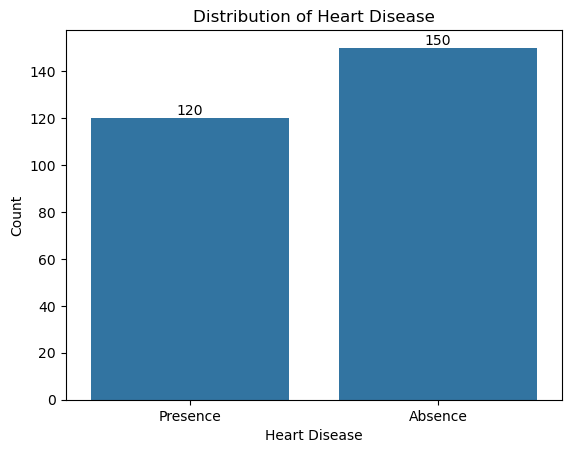

In [6]:

#countplot for only the presence or absence of heart disease
disease_plot = sns.countplot(x="Heart Disease", data=heart_data)


for container in disease_plot.containers:
    disease_plot.bar_label(container)

plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease")
plt.show()

There are 120 patients with a heart disease and 150 patient dont show a presence of heart disease. 

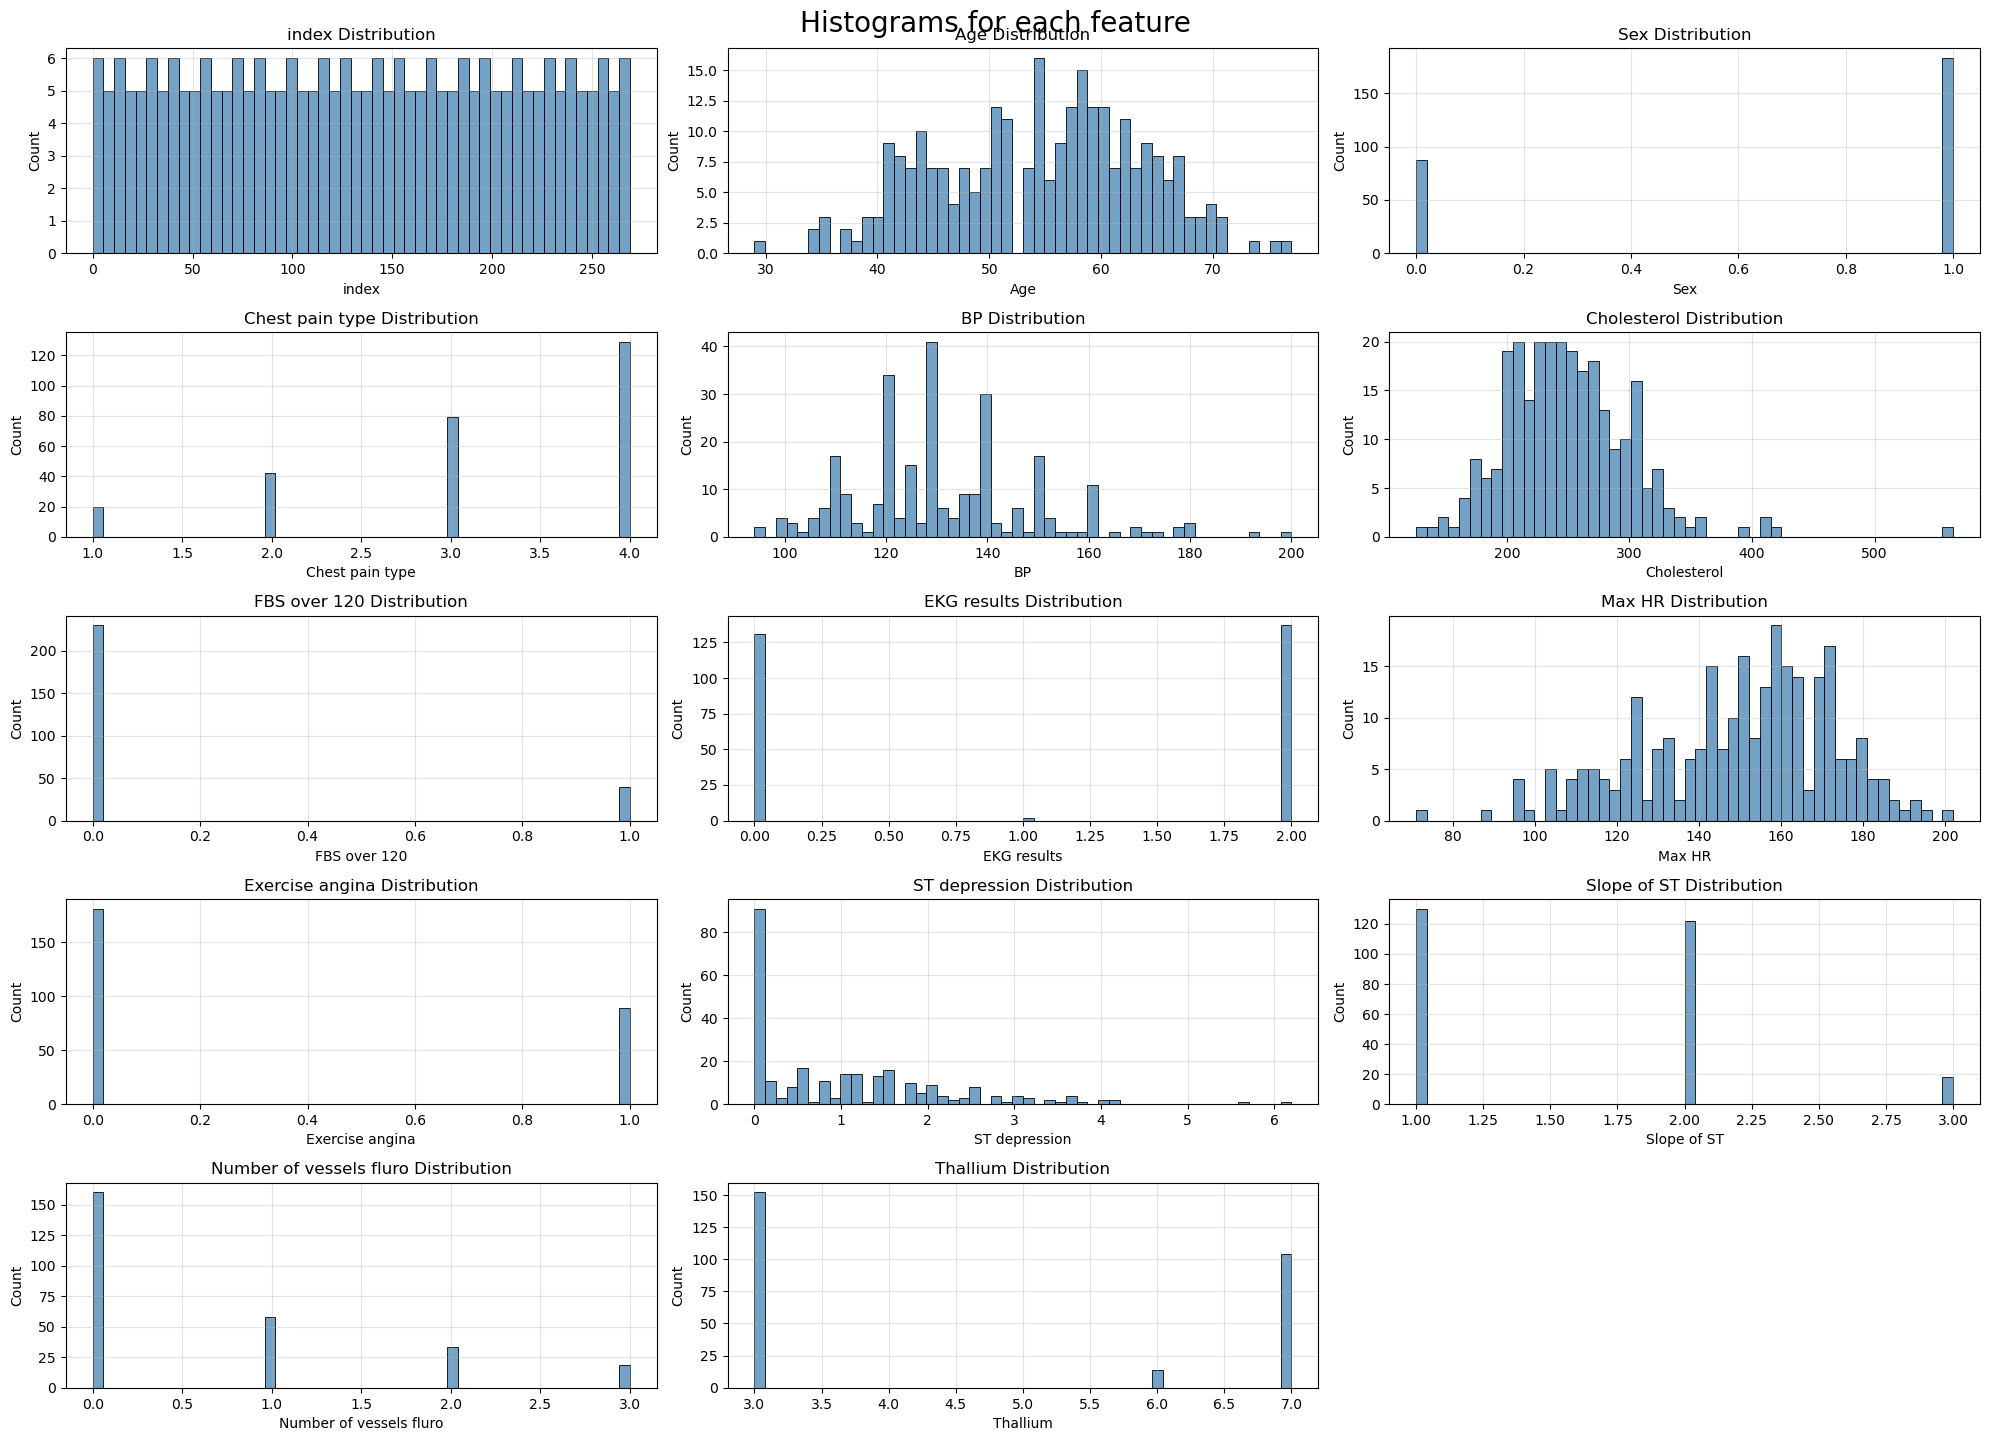

In [7]:

#Distribution of all the varibles

# Create a new dataframe with all the features except the target feature
data = heart_data.loc[:, ~heart_data.columns.isin(["Heart Disease"])]

# Find the number of variables in the dataframe
num_vars =  len(data.columns)

# Calculate the number of rows and columns needed for the grid of subplots
num_rows = (num_vars // 2) + (num_vars % 2)
num_cols = 3

# Grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()


for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=50, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(alpha=0.35)

for j in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Histograms for each feature", fontsize=20)
plt.tight_layout()
plt.show()


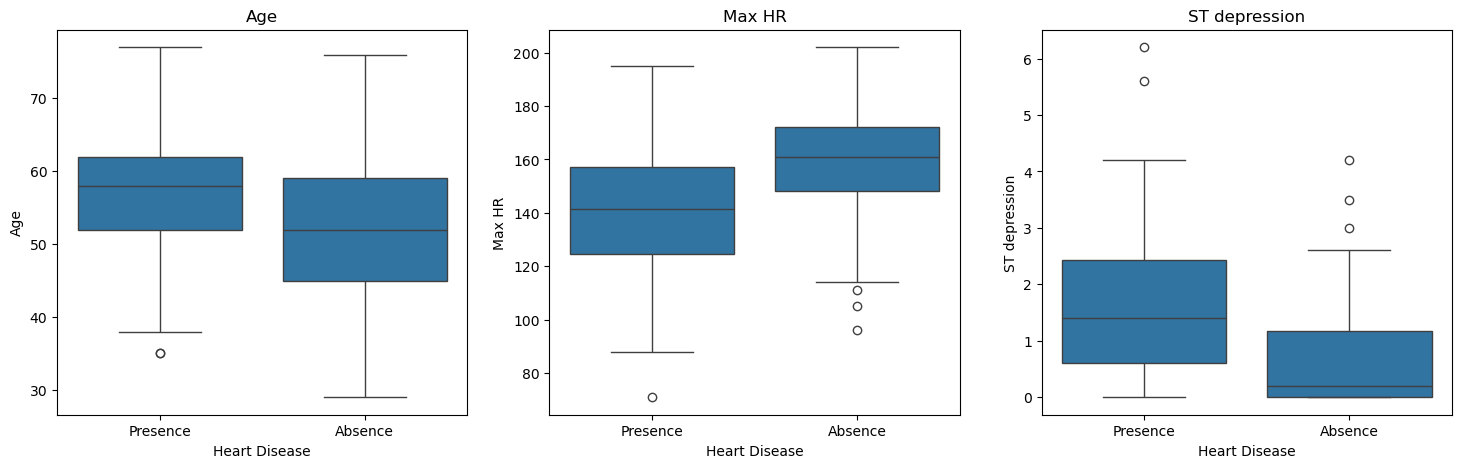

In [8]:
#boxplot von wichtigen Variablen von denen man auch weiss dass die eine verbindung zu heart disease
features = ["Age", "Max HR", "ST depression"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for ax, feature in zip(axes, features):
    sns.boxplot(
        x="Heart Disease",
        y=feature,
        data=heart_data,
        ax=ax
    )
    ax.set_title(feature)




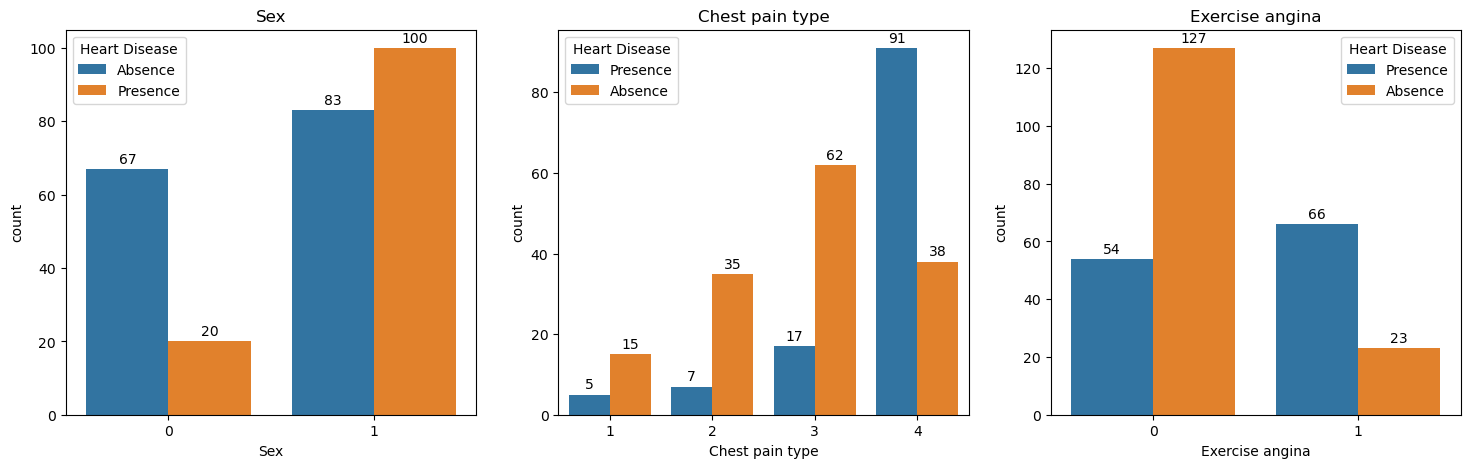

In [9]:
cat_features = ["Sex", "Chest pain type", "Exercise angina"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, feature in zip(axes, cat_features):
    sns.countplot(
        x=feature,
        hue="Heart Disease",
        data=heart_data,
        ax=ax)
    
    for container in ax.containers:
        ax.bar_label(container, padding=2)

    ax.set_title(feature)


#noch female und male in plot

## 3. Preprocessing

Explain what kind of preprocessing, feature encoding you are applying

## 3.1 Cleaning the data

In [10]:
#drop the 'id' column
heart_data = heart_data.drop(columns=['index'])

## 3.2 Target encoding

In [11]:
y = heart_data.pop("Heart Disease")

In [12]:
# Target encoding for absence and presence of heart disease
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]


## 3.3 Train / validation / test splitting

In [13]:
# we change the percentage of train datasets
train_X, test_X, train_y, test_y = train_test_split(heart_data, y, train_size = 0.70, random_state = 1, stratify=y)

validation_X, test_X, validation_y, test_y = train_test_split(test_X, test_y, test_size = 0.5, random_state = 1, stratify=test_y)

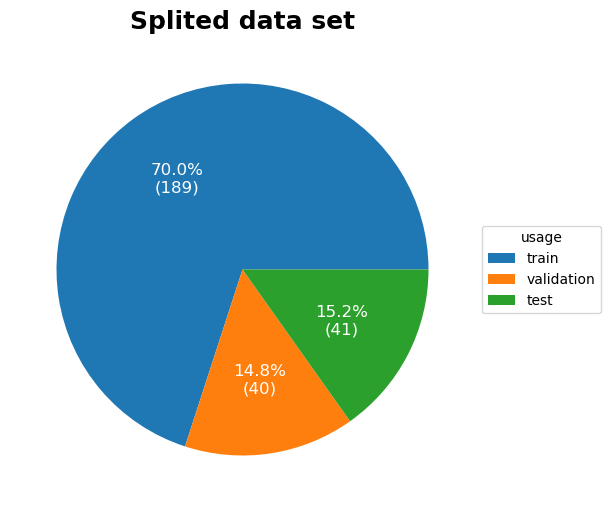

In [14]:
# count length
train_length = len(train_X)
validation_length = len(validation_X)
test_length = len(test_X)

# prepare for matplotlip
length = [train_length,validation_length,test_length]
label = ["train","validation","test"]

# plotting
fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(length, autopct=lambda pct: func(pct, length),
                                  textprops=dict(color="w"))

ax.legend(wedges, label,
          title= "usage",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12)

ax.set_title("Splited data set", size = 18, weight = "bold")

plt.show()

## Encoding

what needs to be encoded:
    Sex binary          category
    Chest pain type     unordered categories
    FBS over 120        binary
    EKG results         categories
    Exercise angina     binary
    Slope of ST         categories
    Thallium            categories

do not one hot enocde:
Age                         continuous
BP
Cholesterol
Max HR
ST depression
Number of vessels fluro     ordered count (0–3)




## 4. Modelling

### 4. 1 symple base-line model -> Luana

perfect model setup for baseline: Logicstic regression

is interpretable, medically standard and easy to explain coefficients

### 4. 2 two sophisticated model approaches

number 1 random forest: captures feature interactions, non linear splits, robust on small datasets

numeber 2 Gradient Boosting or SVM (RBF)


## 4.2.1 Random Forest

Based on this principle, a Random Forest classifier was employed to predict heart disease. The model aggregates predictions from multiple decision trees trained on bootstrapped samples and randomly selected feature subsets, resulting in improved robustness, reduced overfitting, and better generalization performance compared to a single decision tree.

In [15]:
# Build Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create the model
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42,
    class_weight="balanced"
)

# Train the model on training data
clf.fit(train_X, train_y)

# Evaluate on training set
train_pred = clf.predict(train_X)
train_accuracy = accuracy_score(train_y, train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")

# Evaluate on validation set
validation_pred = clf.predict(validation_X)
print("Validation Accuracy:", accuracy_score(validation_y, validation_pred))

# Detailed classification report for validation set
print("\nValidation Classification Report:")
print(classification_report(validation_y, validation_pred))




Training Accuracy: 0.9471
Validation Accuracy: 0.925

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.89      0.94      0.92        18

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



The model shows strong and well-balanced performance, with high validation accuracy (92.5%) and similar precision, recall, and F1-scores across both classes, reflecting on good generalization.

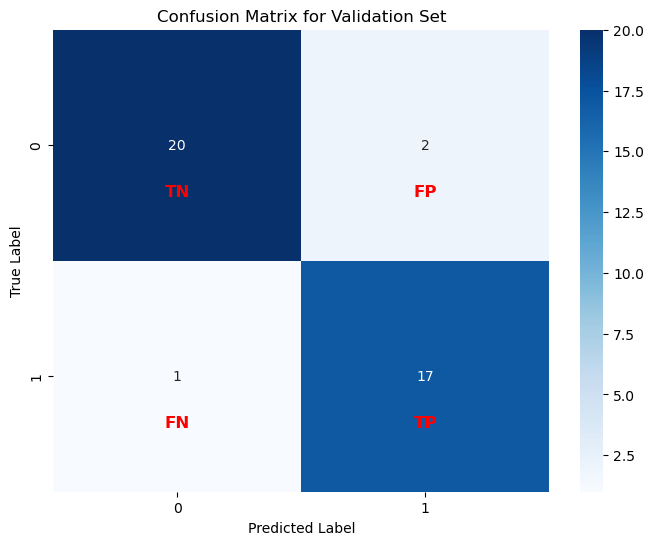

In [16]:
# Confusion Matrix for validation set
cm = confusion_matrix(validation_y, validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add TN, FP, FN, TP labels
labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], 
                ha='center', va='center', 
                fontsize=12, color='red', fontweight='bold')
        
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The confusion matrix on the validation set shows that the Random Forest correctly classified 37 out of 40 patients. Only one patient with heart disease was misclassified as healthy, indicating high sensitivity (94%) for disease detection. While two healthy patients were falsely classified as diseased, this type of error is less critical in a medical context. Overall, the model achieves strong generalization and a clinical meaningful performance.


Top 10 Most Important Features (Mean decrease in impurity MDI):
                    feature  importance
12                 Thallium    0.169636
2           Chest pain type    0.121310
11  Number of vessels fluro    0.118425
9             ST depression    0.105519
7                    Max HR    0.101217
4               Cholesterol    0.076319
3                        BP    0.065020
8           Exercise angina    0.063236
0                       Age    0.061038
1                       Sex    0.060318


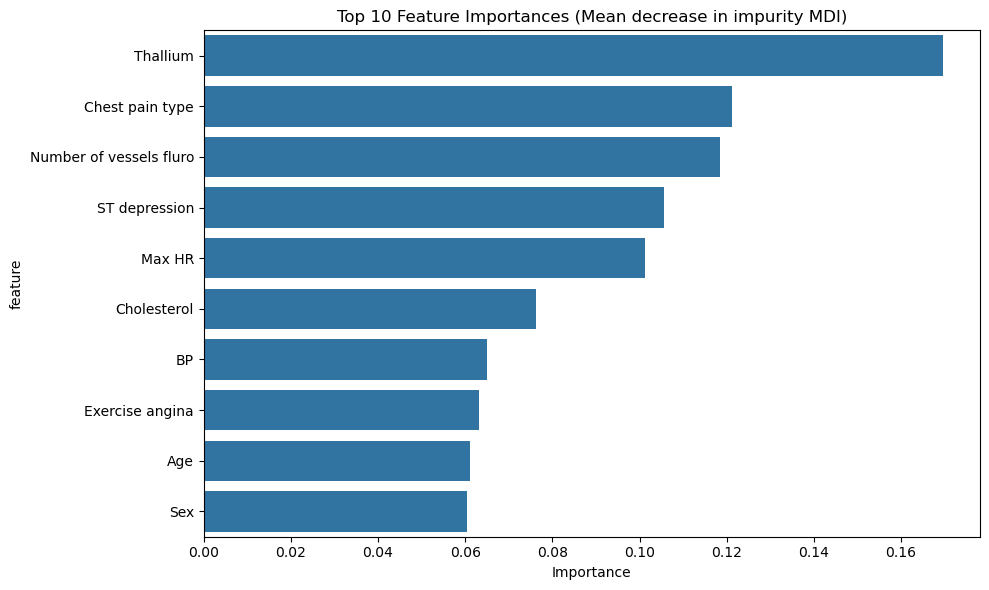

In [17]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': train_X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Mean decrease in impurity MDI):")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', orient='h')
plt.title('Top 10 Feature Importances (Mean decrease in impurity MDI)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Thallium showed the highest feature importance because it frequently enabled splits that strongly separated patients with and without heart disease, leading to substantial reductions in node impurity across the Random Forest. Feature importance reflects predictive contribution within the model rather than causal relevance and is influenced by how effectively a variable partitions the data into homogeneous outcome groups.

### 4.2.1.1 Hyperparameter Tuning

HYPERPARAMETER TUNING:
n_estimators=5: Train Acc=0.9471, Val Acc=0.8500
n_estimators=10: Train Acc=0.9947, Val Acc=0.9000
n_estimators=50: Train Acc=1.0000, Val Acc=0.9250
n_estimators=100: Train Acc=1.0000, Val Acc=0.9500
n_estimators=150: Train Acc=1.0000, Val Acc=0.9500
n_estimators=200: Train Acc=1.0000, Val Acc=0.9500


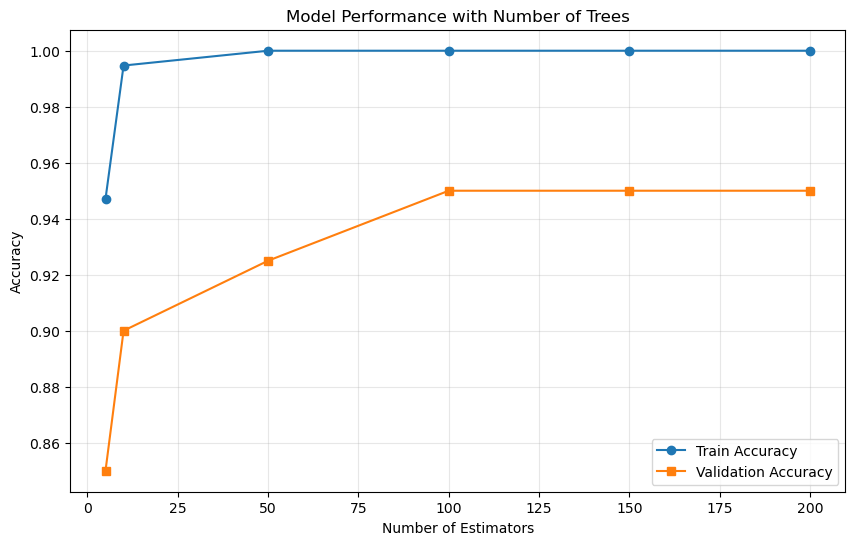

In [18]:
print("HYPERPARAMETER TUNING:")

# Test different numbers of estimators
n_estimators_range = [5, 10, 50, 100, 150, 200]
results = []

for n in n_estimators_range:
    clf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    clf_temp.fit(train_X, train_y)
    
    train_acc = accuracy_score(train_y, clf_temp.predict(train_X))
    val_acc = accuracy_score(validation_y, clf_temp.predict(validation_X))
    
    results.append({
        'n_estimators': n,
        'train_accuracy': train_acc,
        'validation_accuracy': val_acc
    })
    print(f"n_estimators={n}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_estimators'], results_df['train_accuracy'], 
         marker='o', label='Train Accuracy')
plt.plot(results_df['n_estimators'], results_df['validation_accuracy'], 
         marker='s', label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Model Performance with Number of Trees')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Increasing the number of trees improves validation performance up to approximately 100 estimators, after which performance saturates.


TESTING DIFFERENT max_depth VALUES:
max_depth=2: Train Acc=0.8519, Val Acc=0.9250
max_depth=5: Train Acc=0.9365, Val Acc=0.9500
max_depth=10: Train Acc=0.9735, Val Acc=0.9500
max_depth=20: Train Acc=0.9735, Val Acc=0.9500
max_depth=None: Train Acc=0.9735, Val Acc=0.9500


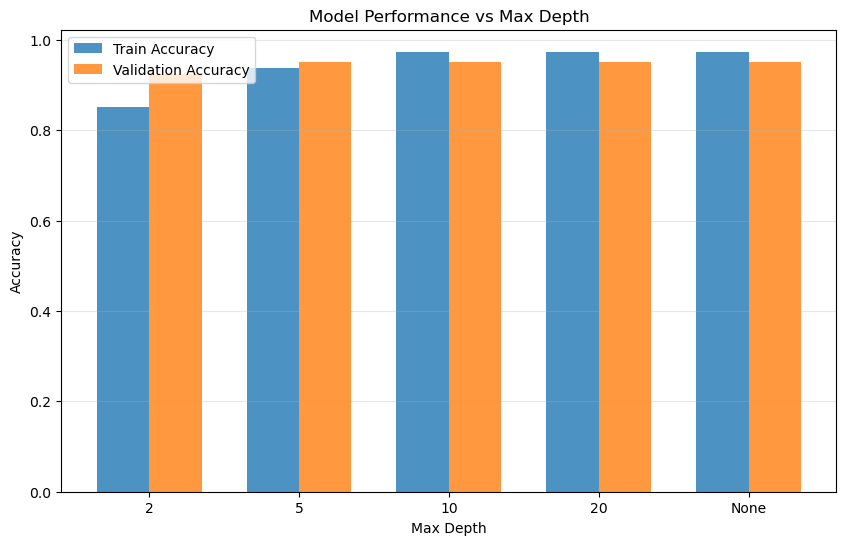

In [19]:
# Test different max_depth values
print("\nTESTING DIFFERENT max_depth VALUES:")
max_depth_range = [2, 5, 10, 20, None]
depth_results = []

for depth in max_depth_range:
    clf_temp = RandomForestClassifier(
    n_estimators=100,
    max_depth=depth,
    min_samples_leaf=2,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42
    )
    clf_temp.fit(train_X, train_y)
    
    train_acc = accuracy_score(train_y, clf_temp.predict(train_X))
    val_acc = accuracy_score(validation_y, clf_temp.predict(validation_X))
    
    depth_results.append({
        'max_depth': str(depth),
        'train_accuracy': train_acc,
        'validation_accuracy': val_acc
    })
    print(f"max_depth={depth}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

depth_results_df = pd.DataFrame(depth_results)

# Plot depth results
plt.figure(figsize=(10, 6))
x_pos = range(len(depth_results_df))
width = 0.35

plt.bar([i - width/2 for i in x_pos], depth_results_df['train_accuracy'], 
        width, label='Train Accuracy', alpha=0.8)
plt.bar([i + width/2 for i in x_pos], depth_results_df['validation_accuracy'], 
        width, label='Validation Accuracy', alpha=0.8)

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Max Depth')
plt.xticks(x_pos, depth_results_df['max_depth'])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()


Varying the maximum tree depth showed that shallow trees underfit the data, whereas increasing depth beyond a certain point did not improve validation performance. A maximum depth of five achieved the highest validation accuracy while maintaining lower model complexity, indicating an optimal bias–variance trade-off. Accordingly, the final model hyperparameters were set to n_estimators = 100 and max_depth = 5.

### 4.2.1.2 Final Model Evaluation on Test Set

In [20]:
import pandas as pd
import numpy as np

X_trainval = pd.concat([train_X, validation_X], axis=0)
y_trainval = np.concatenate([train_y, validation_y])

# Train final model with best parameters
final_clf = RandomForestClassifier(
    n_estimators= 100,
    random_state=42,
    max_depth=5,
)

final_clf.fit(X_trainval, y_trainval)

# Final evaluation on TEST set (use only once!)
test_pred = final_clf.predict(test_X)
test_accuracy = accuracy_score(test_y, test_pred)

print(f"\nFINAL TEST SET RESULTS:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(test_y, test_pred))



FINAL TEST SET RESULTS:
Test Accuracy: 0.8293

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.82      0.78      0.80        18

    accuracy                           0.83        41
   macro avg       0.83      0.82      0.83        41
weighted avg       0.83      0.83      0.83        41



Although validation accuracy reached 95%, performance on the independent final test set was lower, suggesting optimistic validation estimates due to the limited sample size. The test accuracy of 83% therefore provides a more reliable estimate of the model’s true generalization performance.

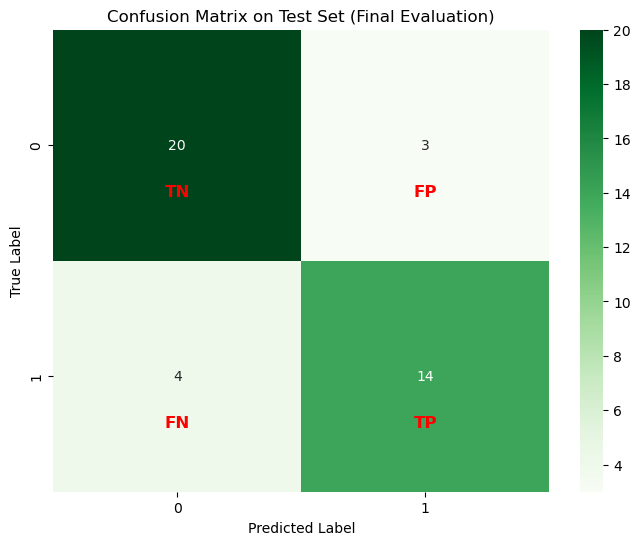

In [21]:
# Final confusion matrix
cm_test = confusion_matrix(test_y, test_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
# Add TN, FP, FN, TP labels
labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], 
                ha='center', va='center', 
                fontsize=12, color='red', fontweight='bold')


plt.title('Confusion Matrix on Test Set (Final Evaluation)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

A Random Forest classifier was developed to predict the presence of heart disease using clinical and diagnostic features. After systematic hyperparameter tuning, a model with 100 trees and a maximum depth of five was selected to balance predictive performance and model complexity. While validation accuracy reached up to 95%, final evaluation on an independent test set resulted in an accuracy of 83%, reflecting the model’s true generalization performance on unseen data. The confusion matrix revealed that most healthy and diseased patients were correctly classified, although a small number of false negatives remained, representing missed heart disease cases. Feature importance analysis indicated that variables such as Thallium, chest pain type, and the number of affected vessels contributed most to the model’s decisions, consistent with clinical expectations. Overall, the results demonstrate that the Random Forest model captures relevant patterns in the data, while highlighting the challenges of generalization and variance in small medical datasets.

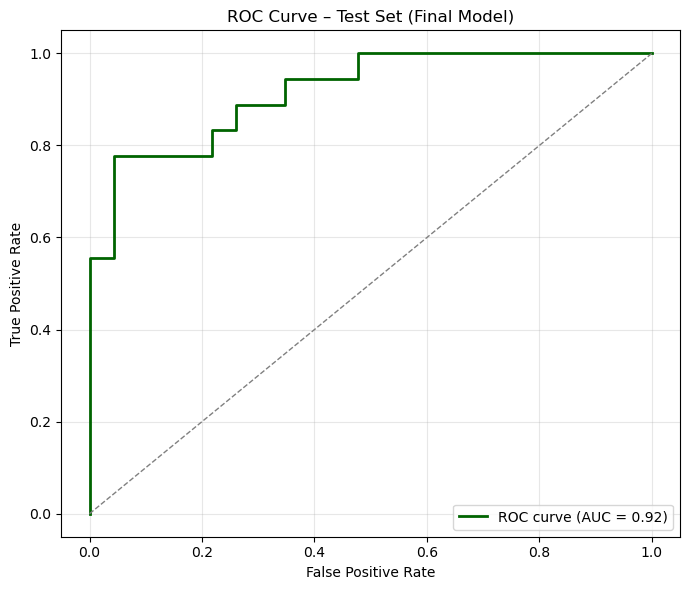

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Disease = 1)
test_probs = final_clf.predict_proba(test_X)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_y, test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="darkgreen", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Test Set (Final Model)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The ROC–AUC of 0.92 provides strong evidence of the model’s ability to discriminate between patients with and without heart disease across a range of decision thresholds.

#### Sources

Alshenawy, F. (2024). Using Machine Learning Algorithms to improve heart disease diagnoses. المجلة العلمية للدراسات والبحوث المالية والتجارية, 5(1), 417–442. https://doi.org/10.21608/cfdj.2024.324103

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

Kathleen, H., H., J., & J., G. (2016). Diagnosing Coronary Heart Disease using Ensemble Machine Learning. International Journal of Advanced Computer Science and Applications, 7(10). https://doi.org/10.14569/IJACSA.2016.071004

Karthick, K., Aruna, S. K., & Manikandan, R. (2022). Development and evaluation of the bootstrap resampling technique based statistical prediction model for Covid-19 real time data : A data driven approach. Journal of Interdisciplinary Mathematics, 25(3), 615–627. https://doi.org/10.1080/09720502.2021.2012890

Quah, J. L. J., Yap, S., Cheah, S. O., Ng, Y. Y., Goh, E. S., Doctor, N., Leong, B. S.-H., Tiah, L., Chia, M. Y. C., & Ong, M. E. H. (2014). Knowledge of Signs and Symptoms of Heart Attack and Stroke among Singapore Residents. BioMed Research International, 2014, 1–8. https://doi.org/10.1155/2014/572425

University of California, Irvine. (n.d.). Heart disease data set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease